In [1]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import cv2

In [2]:
model = YOLO('./saved_model.pt')
model.info()

Model summary: 225 layers, 3,019,233 parameters, 0 gradients, 8.2 GFLOPs


(225, 3019233, 0, 8.2393088)

In [3]:
# Specify the folder containing the images
image_folder = '../../Dataset/GTSRB/Test'



image 1/1 d:\Traffic-Sign-Detection\Models\YOLOv8\..\..\Dataset\GTSRB\Test\08353.png: 640x640 1 Keep right, 5.0ms
Speed: 3.5ms preprocess, 5.0ms inference, 110.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\Traffic-Sign-Detection\Models\YOLOv8\..\..\Dataset\GTSRB\Test\07144.png: 640x608 1 Speed limit (100km/h), 33.5ms
Speed: 1.0ms preprocess, 33.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 608)

image 1/1 d:\Traffic-Sign-Detection\Models\YOLOv8\..\..\Dataset\GTSRB\Test\07860.png: 640x640 1 Speed limit (70km/h), 5.3ms
Speed: 1.0ms preprocess, 5.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\Traffic-Sign-Detection\Models\YOLOv8\..\..\Dataset\GTSRB\Test\10010.png: 608x640 1 Right-of-way at intersection, 29.1ms
Speed: 2.5ms preprocess, 29.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 d:\Traffic-Sign-Detection\Models\YOLOv8\..\..\Dataset\GTSRB\Test\08922.png: 640x576 1 No entry, 29.2

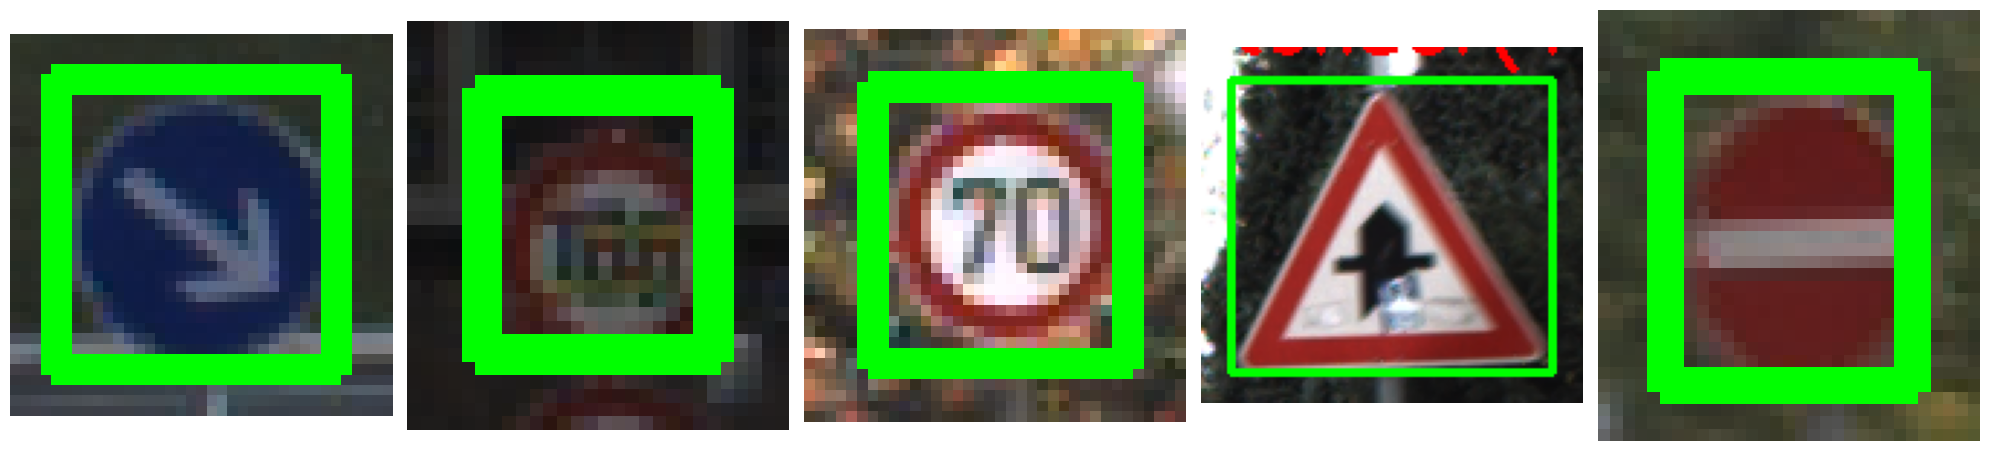

In [4]:
# Get all the image file names from the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Randomly select 5 images
selected_images = random.sample(image_files, 5)

# Set up the plot to show the 5 images
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i, image_file in enumerate(selected_images):
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Make predictions with the model
    results = model(image_path)

    # Iterate over predictions and draw bounding boxes
    for result in results[0].boxes:
        # Get the bounding box coordinates
        x1, y1, x2, y2 = result.xyxy[0].cpu().numpy()
        # Draw the bounding box on the image
        cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        
        # Add the label text (optional, can add confidence score here too)
        label = result.cls[0]  # Class index, can map to label name if needed
        cv2.putText(image_rgb, str(label), (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image in the subplot
    axes[i].imshow(image_rgb)
    axes[i].axis('off')  # Turn off axes

# Show the plot
plt.tight_layout()
plt.show()